Nina Hill TNC Astraea Pilot Project 2020 nina.hill@tnc.org 

In [1]:
from earthai.init import *

import pyspark.sql.functions as F
import geopandas as gpd
import pandas as pd

%matplotlib inline


Importing EarthAI libraries.
EarthAI version 1.4.2; RasterFrames version 0.9.0.dev+astraea.1ce1ff3; PySpark version 2.4.4

Creating SparkSession...
  SparkSession is available as `spark`.


In [2]:
earth_ondemand.collections() # show table of the collections, and details, available through EarthOnDemand

,allowed,description,familyId,familyTitle,id,license,presentable,stac_extensions,stac_version,title,link,spatial_extent,temporal_extent
0,True,Landsat 8 Collection 1 Tier 1 Precision Terrain from Landsat 8 Operational Land Imager (OLI) and Thermal Infrared Sensor (TIRS) data,landsat8,Landsat 8,landsat8_l1tp,PDDL-1.0,True,[],0.9.0,Landsat 8 C1 T1,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2013-03-18 15:59:02.333000+00:00, None)"
1,True,MCD43A4: MODIS/Terra and Aqua Nadir BRDF-Adjusted Reflectance Daily L3 Global 500 m SIN Grid V006,modis,MODIS,mcd43a4,proprietary,True,[],0.9.0,MCD43A4 NBAR,https://eod-catalog-svc-prod.astraea.earth/collections/mcd43a4,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2000-02-16 00:00:00+00:00, None)"
2,True,MOD11A1: MODIS/Terra Land Surface Temperature/Emissivity Daily L3 Global 1 km SIN Grid V006,modis,MODIS,mod11a1,proprietary,True,[],0.9.0,MOD11A1 LST,https://eod-catalog-svc-prod.astraea.earth/collections/mod11a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2000-02-24 00:00:00+00:00, None)"
3,True,MYD11A1: MODIS/Aqua Land Surface Temperature/Emissivity Daily L3 Global 1 km SIN Grid V006,modis,MODIS,myd11a1,proprietary,True,[],0.9.0,MYD11A1 LST,https://eod-catalog-svc-prod.astraea.earth/collections/myd11a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2002-07-04 00:00:00+00:00, None)"
4,True,MOD13A1: MODIS/Terra Vegetation Indices 16-Day L3 Global 500 m SIN Grid V006,modis,MODIS,mod13a1,proprietary,True,[],0.9.0,MOD13A1 VI,https://eod-catalog-svc-prod.astraea.earth/collections/mod13a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2000-02-18 00:00:00+00:00, None)"
5,True,MYD13A1: MODIS/Aqua Vegetation Indices 16-Day L3 Global 500 m SIN Grid V006,modis,MODIS,myd13a1,proprietary,True,[],0.9.0,MYD13A1 VI,https://eod-catalog-svc-prod.astraea.earth/collections/myd13a1,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2002-07-04 00:00:00+00:00, None)"
6,True,Sentinel-2 Level-2A atmospherically corrected data,sentinel,Sentinel,sentinel2_l2a,CC-BY-SA-3.0,True,[],0.9.0,Sentinel-2 L2A,https://eod-catalog-svc-prod.astraea.earth/collections/sentinel2_l2a,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2018-04-01 07:02:22.463000+00:00, None)"
7,True,Sentinel-2 Level-1C top of atmosphere,sentinel,Sentinel,sentinel2_l1c,CC-BY-SA-3.0,True,[],0.9.0,Sentinel-2 L1C,https://eod-catalog-svc-prod.astraea.earth/collections/sentinel2_l1c,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2015-06-27 10:25:31.456000+00:00, None)"
8,True,National Agriculture Imagery Program aerial imagery,naip,NAIP,naip,proprietary,True,[],0.9.0,NAIP,https://eod-catalog-svc-prod.astraea.earth/collections/naip,"POLYGON ((-66.9513812 24.7433195, -66.9513812 4...","(2012-04-23 12:00:00+00:00, None)"
9,True,Maxar Open Data,maxar,Maxar,maxar_open_data,proprietary,True,[],0.9.0,Maxar Open Data,https://eod-catalog-svc-prod.astraea.earth/collections/maxar_open_data,"POLYGON ((180 -90, 180 90, -180 90, -180 -90, 1...","(2008-01-15 00:00:00+00:00, None)"


In [71]:
earth_ondemand.bands('landsat8_l1tp') # from Landsat I want B4 = red, and B5 = nir (NOTE NDWI uses nir and swir16)

,band_name,bundleable,eo_common_name,eo_gsd,roles,title,type,collection_id
0,B5,True,nir,30.0,[data],Band 5 - Near Infrared (NIR) - 851-879nm (30m),image/tiff,landsat8_l1tp
1,thumb_large,True,NaN,NaN,[preview],Thumbnail - Large,image/jpeg,landsat8_l1tp
2,thumb_small,True,NaN,NaN,[thumbnail],Thumbnail - Small,image/jpeg,landsat8_l1tp
3,B9,True,cirrus,30.0,[data],Band 9 - Cirrus - 1363-1384nm (30m),image/tiff,landsat8_l1tp
4,B6,True,swir16,30.0,[data],Band 6 - Shortwave Infrared (SWIR) 1 - 1566-1651nm (30m),image/tiff,landsat8_l1tp
5,B3,True,green,30.0,[data],Band 3 - Green - 533-590nm (30m),image/tiff,landsat8_l1tp
6,B7,True,swir22,30.0,[data],Band 7 - Shortwave Infrared (SWIR) 2 - 2107-2294nm (30m),image/tiff,landsat8_l1tp
7,B10,True,lwir11,30.0,[data],Band 10 - Thermal Infrared (TIRS) 1 - 10600-11190nm (30m),image/tiff,landsat8_l1tp
8,B2,True,blue,30.0,[data],Band 2 - Blue - 452-512nm (30m),image/tiff,landsat8_l1tp
9,BQA,True,NaN,30.0,[qa],Band QA,image/tiff,landsat8_l1tp


import file that represents my area of interest (can be geoJSON, shp, KML)

I made a single polygon surrounding all my GMT transects throughout MN/ND/SD, exported as geoJSON and stored on github /
this doesn't work correctly, needs new url every time? how to fix?

outer_bound = gpd.read_file("outer_boundGMT.shp") # use if you have uploaded the json file to this earthai notebook folder

outer_bound = gpd.read_file('astraea_biomass/outer_boundGMT.json') # from cloned git repository within eartai notebook

In [5]:
boundaries_url = 'https://raw.githubusercontent.com/ninahilltnc/astraea_biomass/master/outer_boundGMT.json?token=APR6VNUPVGESOBWOBMLGJC27DDAJA'

Let's look at some properties of my boundaries_df

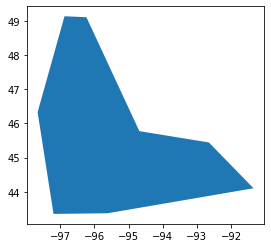

In [7]:
boundaries_df.plot()

In [8]:
boundaries_df.bounds

,minx,miny,maxx,maxy
0,-97.66641,43.348075,-91.339843,49.140694


In [9]:
type(boundaries_df)

geopandas.geodataframe.GeoDataFrame

In [10]:
boundaries_df.area # area summed across all rows (in this case I only have 1 object=1 row)

0    17.626592
dtype: float64

In [11]:
boundaries_df.area[0] # get just the first row, remember Python starts at 0

17.62659173192092

In [12]:
boundaries_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
boundaries_df.columns # might be useful habit to check that 'geometry' column exists and is named and formatted correctly for Shapely

Index(['FID', 'OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'], dtype='object')

In [14]:
boundaries_df.head # shows I have 1 polygon with geometry but no other tabular attribute data

<bound method NDFrame.head of    FID  OBJECTID  SHAPE_Leng  SHAPE_Area  \
0    0         0           0           0   

                                            geometry  
0  POLYGON ((-97.66641 46.32961, -97.20076 43.348...  >

In [15]:
len(boundaries_df)

1

In [16]:
boundaries_df["geometry"].nunique() # number of unique values within a column of dataset

1

In [17]:
print(boundaries_df['geometry'].head()) # call the column name in brackets

0    POLYGON ((-97.66641 46.32961, -97.20076 43.348...
Name: geometry, dtype: geometry


Ok, get serious. Use boundaries_df, with other parameters, to query Astraea's EarthOnDemand catalog of imagery. \
parameters:   location, start time and end time, max cloud cover, and which collection I want to pull from

This is a test to get code working. I'll have to revisit this section to match GMT field observation dates with imagery dates.
Get GMT sample location-date list for query and select multiple images (how many?) from imagery date closest to field sampling date. \
How many images to average across? \
What is time range to collect multiple images? Depends on revisit date for satellite I choose 
(e.g. Landsat revisits same location every ~16 days)

In [18]:
nhcatalog = earth_ondemand.read_catalog(
 geo = boundaries_df,
 start_datetime = '2019-06-01',
 end_datetime = '2019-06-15',
 max_cloud_cover = 100,
 collections='landsat8_l1tp')

100%|██████████| 23/23 [00:00<00:00, 56.95it/s]


In [37]:
print(f"`nhcatalog` has {len(nhcatalog.id.unique())} distinct scenes ids") # note scene = granule

`nhcatalog` has 23 distinct scenes ids


In [55]:
type(nhcatalog)

geopandas.geodataframe.GeoDataFrame

Need to convert geopandas df to spark df for some reason...use with some functions

In [56]:
nhspark = spark.read.raster(nhcatalog, catalog_col_names=['B4','B5']) \
.withColumnRenamed('B4', 'red').withColumnRenamed('B5', 'nir')

In [58]:
type(nhspark)

pyspark.sql.dataframe.DataFrame

In [59]:
# from EarthAI tutorial. need to reproject my polygon to same CRS as imagery
nhspark = nhspark.withColumn('geo_native',
 st_reproject('geometry', rf_mk_crs(str(boundaries_df.crs)), rf_crs('nir'))) \
 .filter(st_intersects(rf_geometry('nir'), 'geo_native')).filter(rf_tile_max('nir') > 0) 

nir,red,poly_center,tile_center
,,POINT (580650.0000004865 4939349.9999997...,POINT (506625 5053275)
,,POINT (580650.0000004865 4939349.9999997...,POINT (514305 5053275)
,,POINT (580650.0000004865 4939349.9999997...,POINT (521985 5053275)
,,POINT (580650.0000004865 4939349.9999997...,POINT (529665 5053275)
,,POINT (580650.0000004865 4939349.9999997...,POINT (537345 5053275)

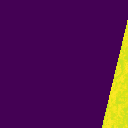
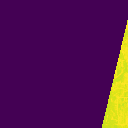
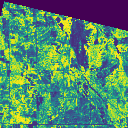
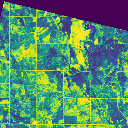
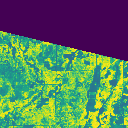
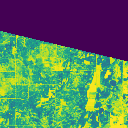
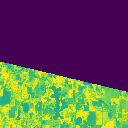
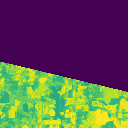
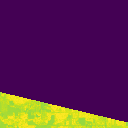
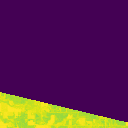

In [44]:
nhspark.select('nir', 'red', st_centroid('geo_native') \
.alias('poly_center'), st_centroid(rf_geometry('nir')) \
.alias('tile_center'))

In [ ]:
dfndvi = spark.read.raster(nhcatalog, catalog_col_names=['B4', 'B5']) \
.withColumnRenamed('B4', 'red').withColumnRenamed('B5', 'nir') # this is for NDVI; other char is NDWI uses nir and swir16



run all this with smaller Bluestem Prairie polygon



In [30]:
blstm_url = 'https://raw.githubusercontent.com/ninahilltnc/astraea_biomass/master/test_blstmjson.json?token=APR6VNTMZZTXBE7L7SDBNHS7DDBGY'

In [31]:
boundaries_df = gpd.read_file(boundaries_url) # read in file indicated by my new object

In [33]:
blstm_df = gpd.read_file(blstm_url) # read in file indicated by my new object

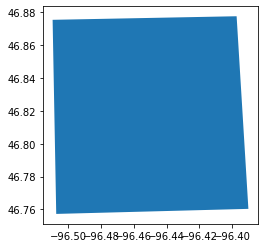

In [34]:
blstm_df.plot()

In [52]:
blstmcatalog = earth_ondemand.read_catalog(
 geo = blstm_df,
 start_datetime = '2019-06-01',
 end_datetime = '2019-06-04',
 max_cloud_cover = 100,
 collections='landsat8_l1tp')

100%|██████████| 2/2 [00:00<00:00, 15.45it/s]


In [54]:
print(f"`blstmcatalog` has {len(blstmcatalog.id.unique())} distinct scenes ids")

`blstmcatalog` has 2 distinct scenes ids


In [57]:
blstmspark = spark.read.raster(blstmcatalog, catalog_col_names=['B4','B5']) \
.withColumnRenamed('B4', 'red').withColumnRenamed('B5', 'nir') # covert from geopandas to spark

In [62]:
# from EarthAI tutorial. need to reproject my polygon to same CRS as imagery
blstmspark = blstmspark.withColumn('geo_native',
 st_reproject('geometry', rf_mk_crs(str(boundaries_df.crs)), rf_crs('nir'))) \
 .filter(st_intersects(rf_geometry('nir'), 'geo_native')).filter(rf_tile_max('nir') > 0) 

nir,red,poly_center,tile_center,datetime
,,POINT (642750.0000015055 5256299.9999972...,POINT (569025 5370075),2019-06-02 17:16:30.438118
,,POINT (642750.0000015055 5256299.9999972...,POINT (576705 5370075),2019-06-02 17:16:30.438118
,,POINT (642750.0000015055 5256299.9999972...,POINT (584385 5370075),2019-06-02 17:16:30.438118
,,POINT (642750.0000015055 5256299.9999972...,POINT (592065 5370075),2019-06-02 17:16:30.438118
,,POINT (642750.0000015055 5256299.9999972...,POINT (599745 5370075),2019-06-02 17:16:30.438118

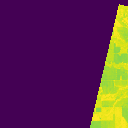
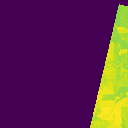
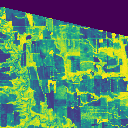
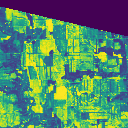
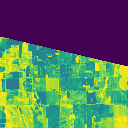
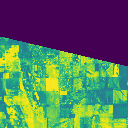
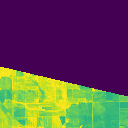
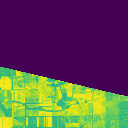
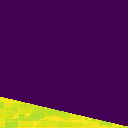
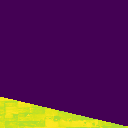

In [83]:
blstmspark.select('nir', 'red', st_centroid('geo_native') \
.alias('poly_center'), st_centroid(rf_geometry('nir')) \
.alias('tile_center'), 'datetime') # rf_crs('nir').alias('crs')

why showing 5 scenes when it told me above that I have 2 scenes? 

are these tiles? how many tiles in a scene? Yes, "tiles are often the primary discretization unit used in RasterFrames"; "Tiles are often square and the dimensions are some power of two, for example 256 by 256."

In [70]:
len(blstmcatalog)

2

In [81]:
blstmcatalog.head(5).drop(columns='geometry')

,eod_collection_attribution,eod_collection_display_name,eod_collection_family,eod_collection_family_display_name,eod_epsg4326_geometry_simplified,eod_grid_id,created,datetime,eo_cloud_cover,eo_constellation,...,self_link,bundle_link,preview_link,fullres_link,maplayer_link,leaflet_link,statistics_link,tileinfo_link,collection,id
0,USGS/NASA Landsat,Landsat 8,landsat8,Landsat 8,"{'coordinates': [[[[-99.14889251371183, 44.93641088002456], [-99.14889251371183, 47.0930074727114], [-96.0912669339668, 47.0930074727114], [-96.0912669339668, 44.93641088002456], [-99.14889251371183, 44.93641088002456]]]], 'type': 'MultiPolygon'}",WRS2-030028,2019-08-19T14:47:23.537284Z,2019-06-02 17:16:54.324923+00:00,4.67,landsat-8,...,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/bundle,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/preview,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/fullres,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/maplayer,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/maplayer/leaflet,'https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/maplayer/statistics',https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030028_20190602_20190618_01_T1_L1TP/maplayer/tileinfo,landsat8_l1tp,LC08_L1TP_030028_20190602_20190618_01_T1_L1TP
1,USGS/NASA Landsat,Landsat 8,landsat8,Landsat 8,"{'coordinates': [[[[-98.65136187897376, 46.352411179864994], [-98.65136187897376, 48.51764044444718], [-95.50013881903092, 48.51764044444718], [-95.50013881903092, 46.352411179864994], [-98.65136187897376, 46.352411179864994]]]], 'type': 'MultiPolygon'}",WRS2-030027,2019-08-19T15:32:29.925445Z,2019-06-02 17:16:30.438118900+00:00,5.17,landsat-8,...,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/bundle,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/preview,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/fullres,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/maplayer,https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/maplayer/leaflet,'https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/maplayer/statistics',https://eod-catalog-svc-prod.astraea.earth/collections/landsat8_l1tp/items/LC08_L1TP_030027_20190602_20190618_01_T1_L1TP/maplayer/tileinfo,landsat8_l1tp,LC08_L1TP_030027_20190602_20190618_01_T1_L1TP


In [74]:
blstmspark = blstmspark.withColumn('ndvi', rf_normalized_difference('nir', 'red'))

nir,red,ndvi,poly_center,tile_center,datetime
,,,POINT (642750.0000015055 5256299.9999972...,POINT (569025 5370075),2019-06-02 17:16:30.438118
,,,POINT (642750.0000015055 5256299.9999972...,POINT (576705 5370075),2019-06-02 17:16:30.438118
,,,POINT (642750.0000015055 5256299.9999972...,POINT (584385 5370075),2019-06-02 17:16:30.438118
,,,POINT (642750.0000015055 5256299.9999972...,POINT (592065 5370075),2019-06-02 17:16:30.438118
,,,POINT (642750.0000015055 5256299.9999972...,POINT (599745 5370075),2019-06-02 17:16:30.438118

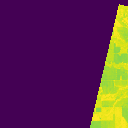
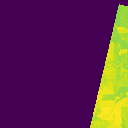
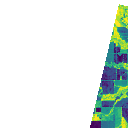
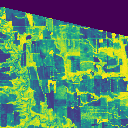
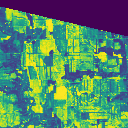
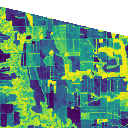
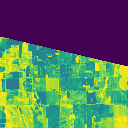
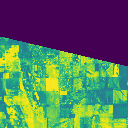
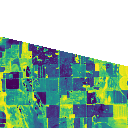
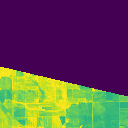
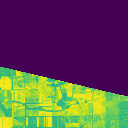
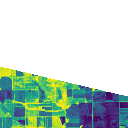
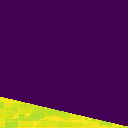
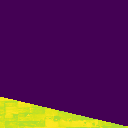
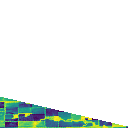

In [76]:
blstmspark.select('nir', 'red', 'ndvi', st_centroid('geo_native') \
.alias('poly_center'), st_centroid(rf_geometry('nir')) \
.alias('tile_center'), 'datetime') # rf_crs('nir').alias('crs')

Maybe the below code to import shp and json not working because of the way the EarthAI notebook is set up, it references the cloud workspace and does not connect to my computer???

import os # use os to tell notebook where to get files on my local computer, or this session workspace (?)

# Define path to folder
input_folder = r"C:/Users/nina.hill/xNina/ASTRAEA/data" # using r identifies this as single string and will not break up into multiple strings if there are special break characters

# Join folder path and filename
filepath = os.path.join(input_folder, "outer_boundGMT.json")

# Print out the full file path
print(filepath)

df = gpd.read_file(filepath, driver="GeoJSON") # use if you have defined the filepath to the file's location on my computer

df = gpd.read_file("outer_boundGMT.shp") # use if you have uploaded the json file to this notebook. Maybe needs to be ZIPPED?

from earthai.init import *
df = spark.read.shapefile('outer_boundGMT.shp') # use if you have all of the associated shp uploaded to this notebook

df2 = spark.read.shapefile('http://maps.tnc.org/files/shp/terr-ecoregions-TNC.zip')

import geopandas as gpd
df = gpd.read_file('http://maps.tnc.org/files/shp/terr-ecoregions-TNC.zip')

In [ ]:
geo_admin_url = 'https://raw.githubusercontent.com/datasets/geo-admin1-us/master/data/admin1-us.geojson'
adm1 = geopandas.read_file(geo_admin_url).drop(columns='id')
adm1_alar = adm1[adm1.state_code.isin(['AL', 'AR'])]
adm1_alar.plot()

In [ ]:
catalog = earth_ondemand.read_catalog(
    adm1_alar,
    '2018-01-01',
    '2018-03-31',
    max_cloud_cover=10,
    collections='landsat8_l1tp'
)

In [ ]:
# this is pasted code from EarthOnDemand API query -> export to notebook
%%eod --name blstm_df --map extents
{
    "collections": [
        "landsat8_l1tp"
    ],
    "geo": [
        -96.53892517089845,
        46.72856582519056,
        -96.3384246826172,
        46.898208270105194
    ],
    "max_cloud_cover": 65,
    "item_ids": [
        "LC08_L1TP_029028_20190830_20190916_01_T1_L1TP"
    ],
    "grid_ids": [
        "WRS2-029028"
    ],
    "start_datetime": "2019-06-01T00:00:00.000Z",
    "end_datetime": "2019-08-31T00:00:00.000Z"
}